# **Q1**

**Answer:** D

# Q2

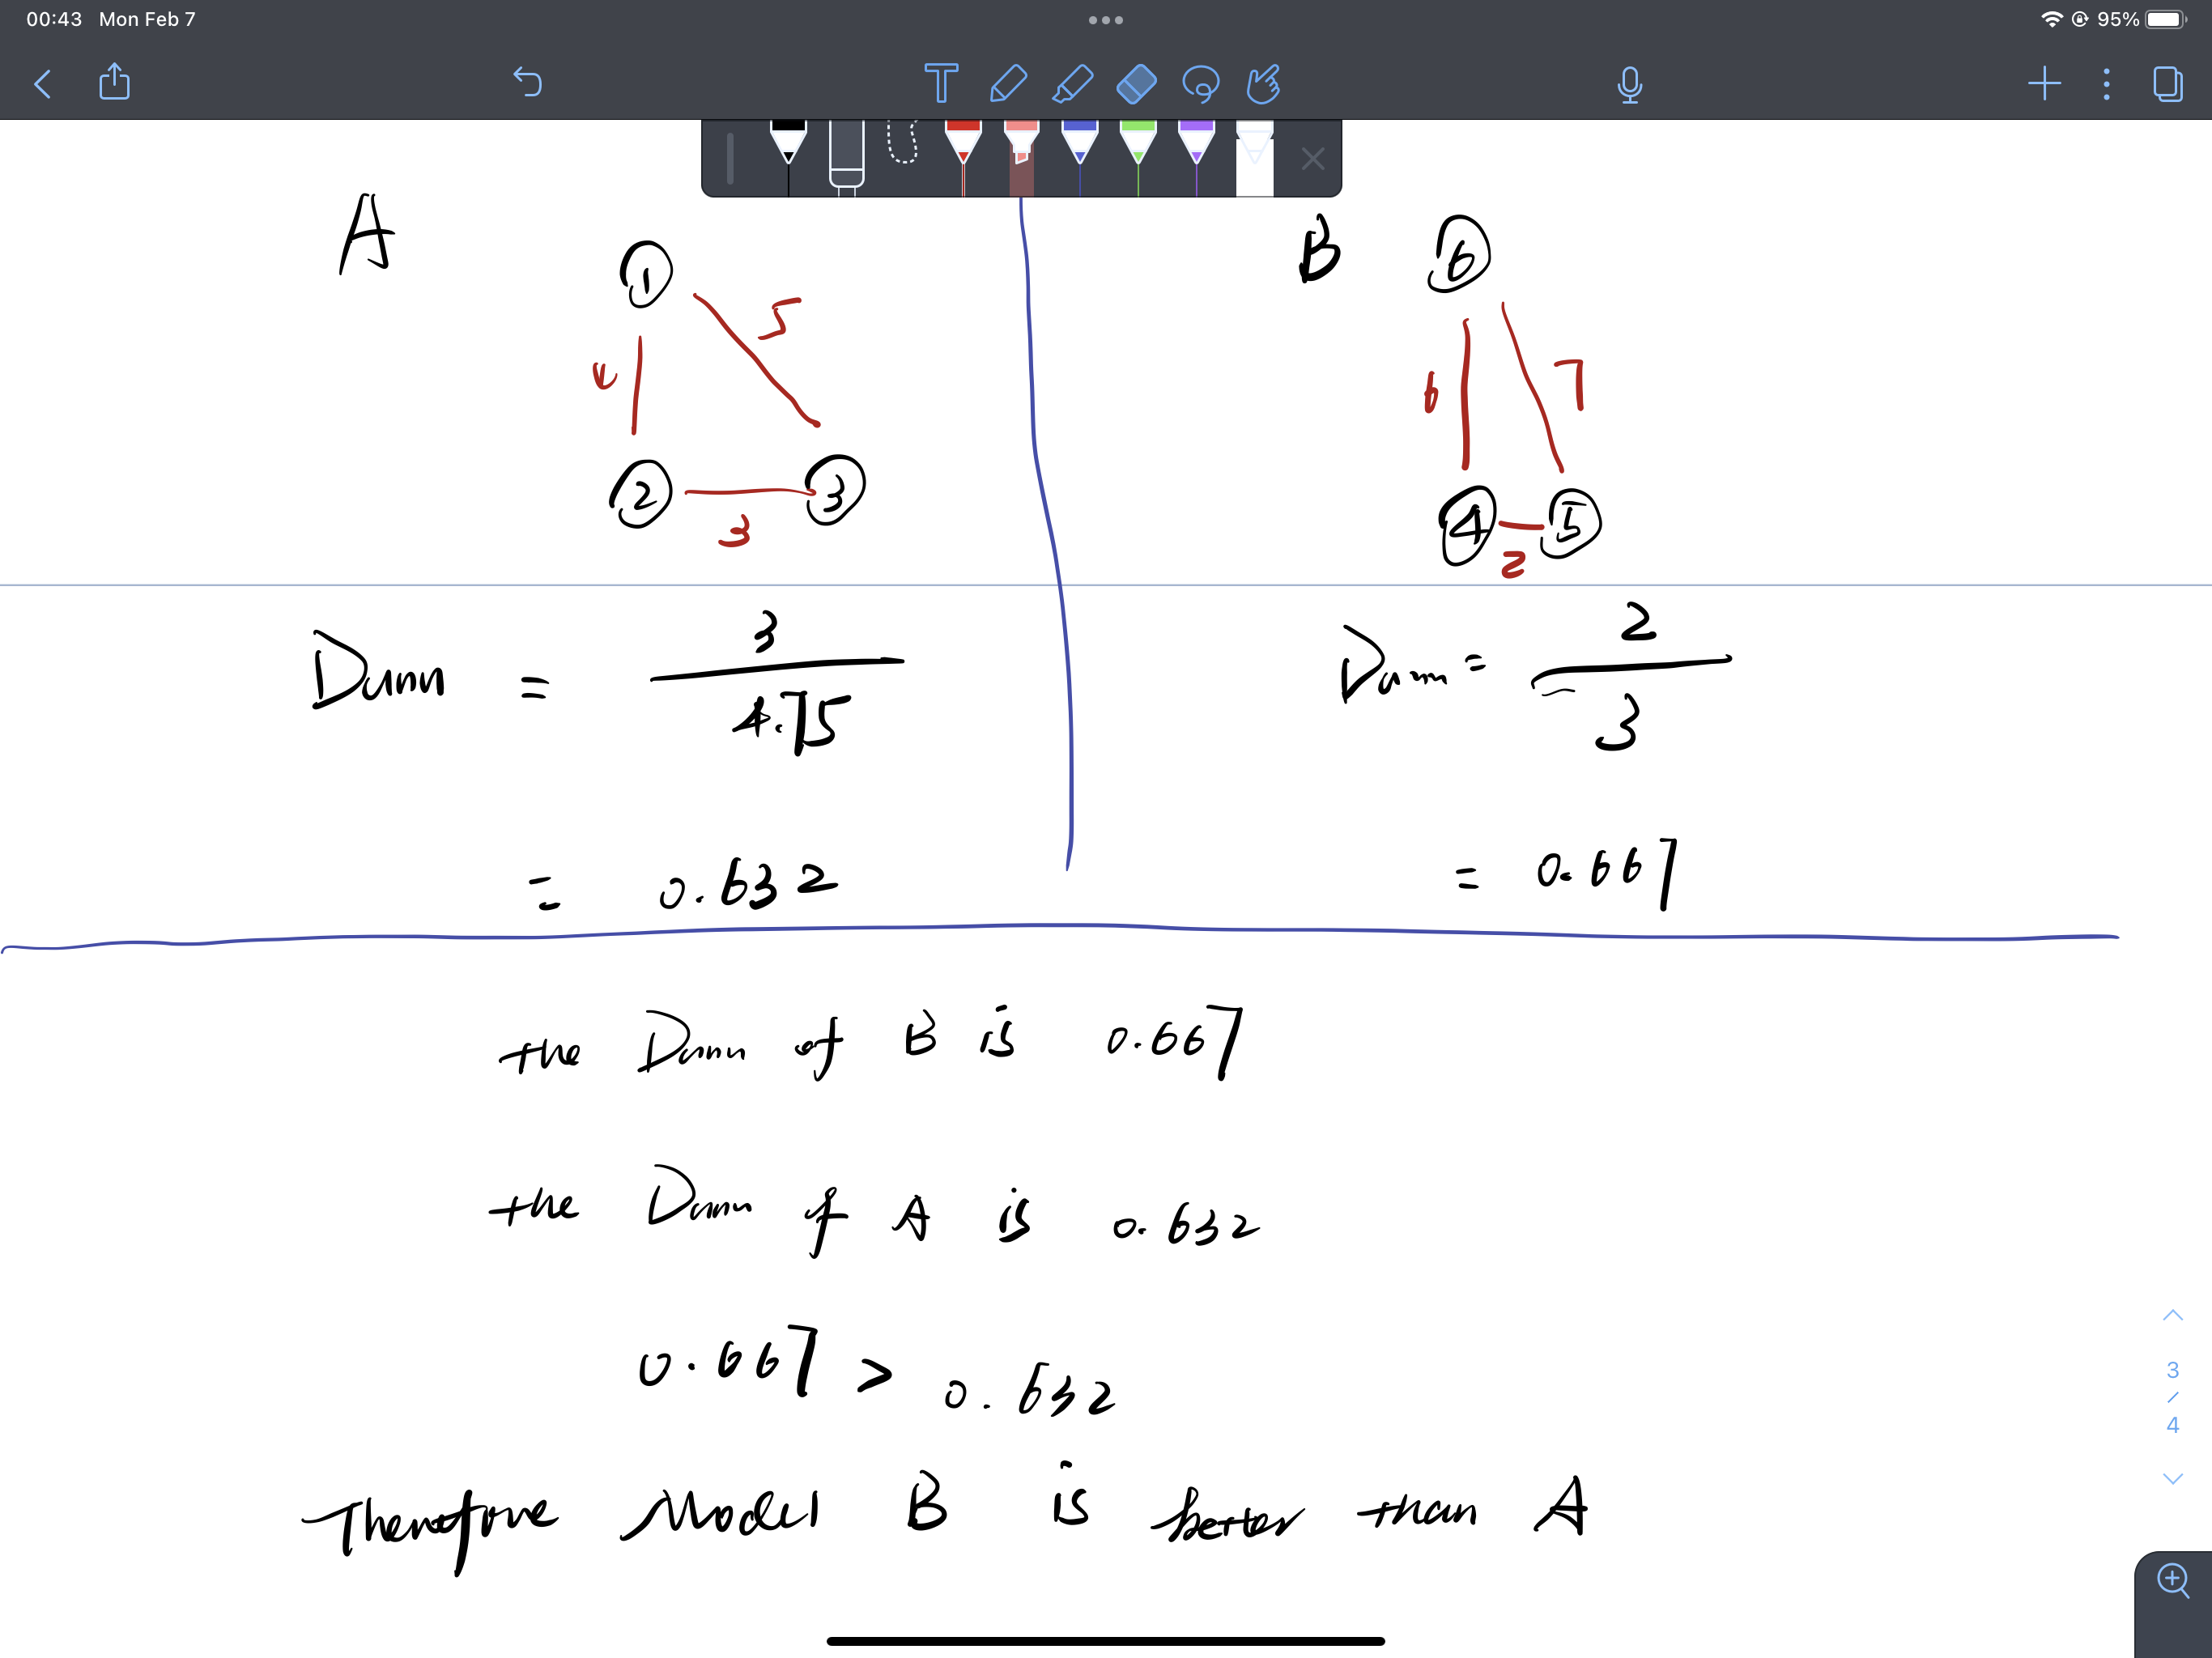

**Answer:**

The Dunn Index of B is 0.667, 

The Dunn Index of A is 0.632,

since B is better than A

# Q3

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

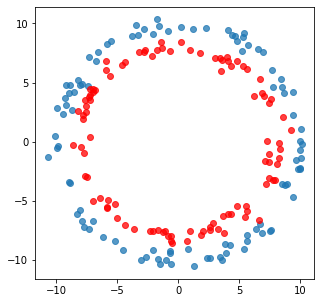

In [31]:
r_big = np.random.normal(10,np.sqrt(0.2),size = (100))
theta_big = 2 * np.pi * np.random.rand(100) 
r_small = np.random.normal(8,np.sqrt(0.2),size = (100)) 
theta_small = 2 * np.pi * np.random.rand(100) 
x_big = r_big * np.cos(theta_big)
y_big = r_big * np.sin(theta_big)
x_small = r_small * np.cos(theta_big)
y_small = r_small * np.sin(theta_big)
X = np.hstack((x_big,x_small))
Y = np.hstack((y_big,y_small))
df = pd.DataFrame([X,Y]).T
plt.figure(figsize = (5, 5))
plt.scatter(x_big, y_big, alpha=0.75)
plt.scatter(x_small, y_small, alpha=0.75,color = 'red')
plt.show()

**K-Means**

Text(0.5, 1.0, 'Use the Elbow Rule to Determine the Optimal K Value')

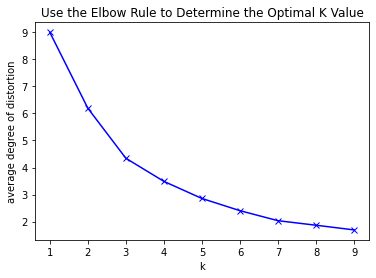

In [43]:
K=range(1,10)
meandistortions=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df)
    meandistortions.append(sum(np.min(
            cdist(df,kmeans.cluster_centers_,
                 'euclidean'),axis=1))/df.shape[0])
plt.plot(K,meandistortions,'bx-')
plt.xlabel('k')
plt.ylabel('average degree of distortion')
plt.title('Use the Elbow Rule to Determine the Optimal K Value')

K = 2 and K = 3 are both acceptable

**K=2**

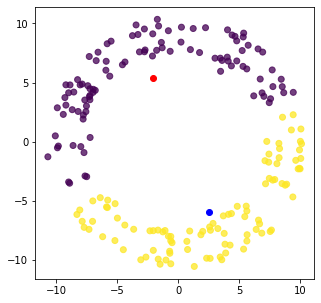

In [42]:
km = KMeans(n_clusters=2, init='random', n_init=500)
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

plt.figure(figsize = (5, 5))
plt.scatter(X, Y, alpha=0.75,c = labels)
plt.scatter(centroids[0,0],centroids[0,1],c = 'red')
plt.scatter(centroids[1,0],centroids[1,1],c = 'blue')

plt.show()

**K=3**

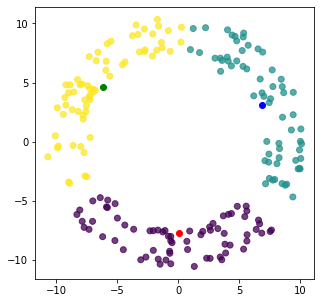

In [49]:
df = pd.DataFrame([X,Y]).T
km = KMeans(n_clusters=3, init='random', n_init=500)
km.fit(df)
labels = km.predict(df)
centroids = km.cluster_centers_

plt.figure(figsize = (5, 5))
plt.scatter(X, Y, alpha=0.75,c = labels)
plt.scatter(centroids[0,0],centroids[0,1],c = 'red')
plt.scatter(centroids[1,0],centroids[1,1],c = 'blue')
plt.scatter(centroids[2,0],centroids[2,1],c = 'green')

plt.show()

**Agglomerative clustering**

K = 2

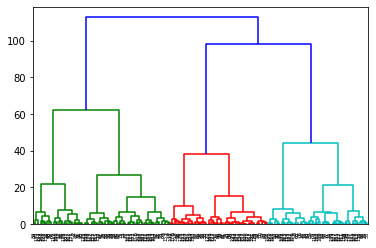

In [64]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=2, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(df)

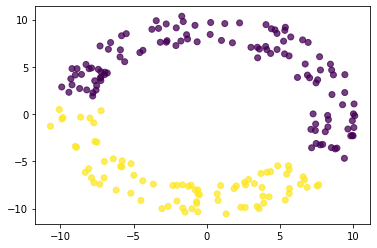

In [65]:
plt.scatter(X, Y, alpha=0.75,c = y_hc)

**K = 3**

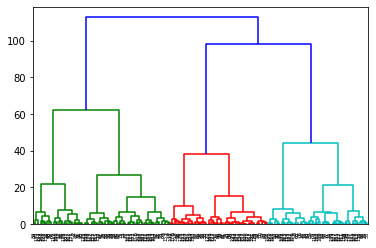

In [71]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
# create clusters
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(df)

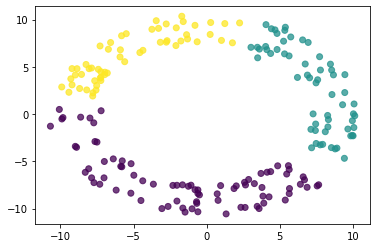

In [72]:
plt.scatter(X, Y, alpha=0.75,c = y_hc)

When **K = 2**, K-Means and Agglomerative clustering are both able to separate the donut dataset.

When **K = 3**, K-Means can divid the dataset into three equal parts. Although Agglomerative clustering can also divid the dataset into three parts, they three are not equal.

Therefore, I suppose **K-Means** have a better performance.

# Q4

 I will introduce my system in three aspects:

 1.features\
 2.models\
 3.optimized target

**Introduction**

Product Recommendations algorithm refers to recommending information or products that may be of interest to users by analyzing and mining user behavior, discovering users' personalized needs and interest characteristics. To arrive this goal, we can abstract features from products, users and environments as inputs to the ML models. Then, according to defult model and renew the parameters by interactions, the models will be more and more accurate and precisely recommend the products which the models think are correct to some specific customers. Furthermore, the parameters and restrictions can be modified by maintainance engineers, leading to more accurate results. 

In a word, the algorithm wants to predic the probability of clicking to the products they want to recommend. Therefore, we can do some works that calculat the probability according to the user's characteristics and product characteristics, and sort them, so as to select several products that are most likely to be clicked.

So the probability fomula can be as follows:

$F(P_{clk}|X_{user}X_{pro}X_{env})$

$P_{clk}$ : the probability of clicking on the product\
$X_{user}$: the features of users\
$X_{pro}$: the features of products\
$X_{env}$: the features of environment 


**1.features**

Firstly, we can abstract features from **users** or **customers**. 

For **Age**, young people and old people can be a great pair of characters, and some customized content could be calculated. For example, for the young, they might be are familiar  with video-game, school life and electric products, by contrast, health care，family life and the discounted merchandise are perfect tries providing to elders.

For **basic information**, there are some awesome features to choose: the phone brand of users, locations and the length of registration(maybe in an app or a website). They are all factors which may influence the result of algorithm--even in light weight.

For **actions**, we can learn users' actions from the videos, pages or some pictures they viewed. By recognizing the labels of the things they clicked, it is easy to guess what they want further, and then we can forwards these things that they may be interested in to them.

For **interests**, just like actions, after recognizing the main topics of what people like to see, the only one thing we need to do is recommending relevant things to them, whatever games, cartoons, music or dance, just do what they want.


What's more, the characteristics of **products**  can also be discovered.

Features of the product itself cannot be ignored actually. The main content, titles and subtitles, labels, and topics something are potential factors that lead to the results of models. Futhermore, these features could be matched with those of users' interests. If matched, forward them!

Besides, interactive features of the product is also crucial. This kind of features link tightly between customers and commodities:the click-through rate of the product within a certain period of time(past 7 days, 14 days, 21 days and so on), the number of plays, comments, and  forwarding of the introduction video, as well as the sales performance of the new product after its launch, and even the sales and usage feedbacks of related products. These custumer-based features decide whether the commodities sales are hot or deserted.However, for those which just launched, this kind of feature parameters should be manipulated by companies or merchants, or the merchandise will hardly be viewed by people due to the algrithom.



Finally, the **environment** elements may also make some influences of the output of models.

For example, the time when people just browses the items. It is absolutely different that the things what people prefer to buy in the morning and at night. So the machine could decide what to do  in various time. This can also be implemented during some special periods like the 2022 Beijing Winter Olympics，as we all known, the mascot called BingDunDun is super famous in this time, and people's enthusiasm to buy it has reached its peak.

By the way, some other factors can also influence the decision, like the way that people browse the items, I mean by mobile, personal computer or on websites. The decision might be different in some aspects but almost the same, in my opinion. 

**2.Models**

To begin with, I would like to introduce the **tree-based** models. 

For example, a decision tree can determine the user's hobbies through layer-by-layer judgment conditions. It can be super deep to make decicsions and plenty of them can be the composition of a decision forest.

In the forest, each tree makes one or a few decisions to be as the input of the merge layer. After merging these inputs, model will output the result that based on the hobbies and interests collected from users.

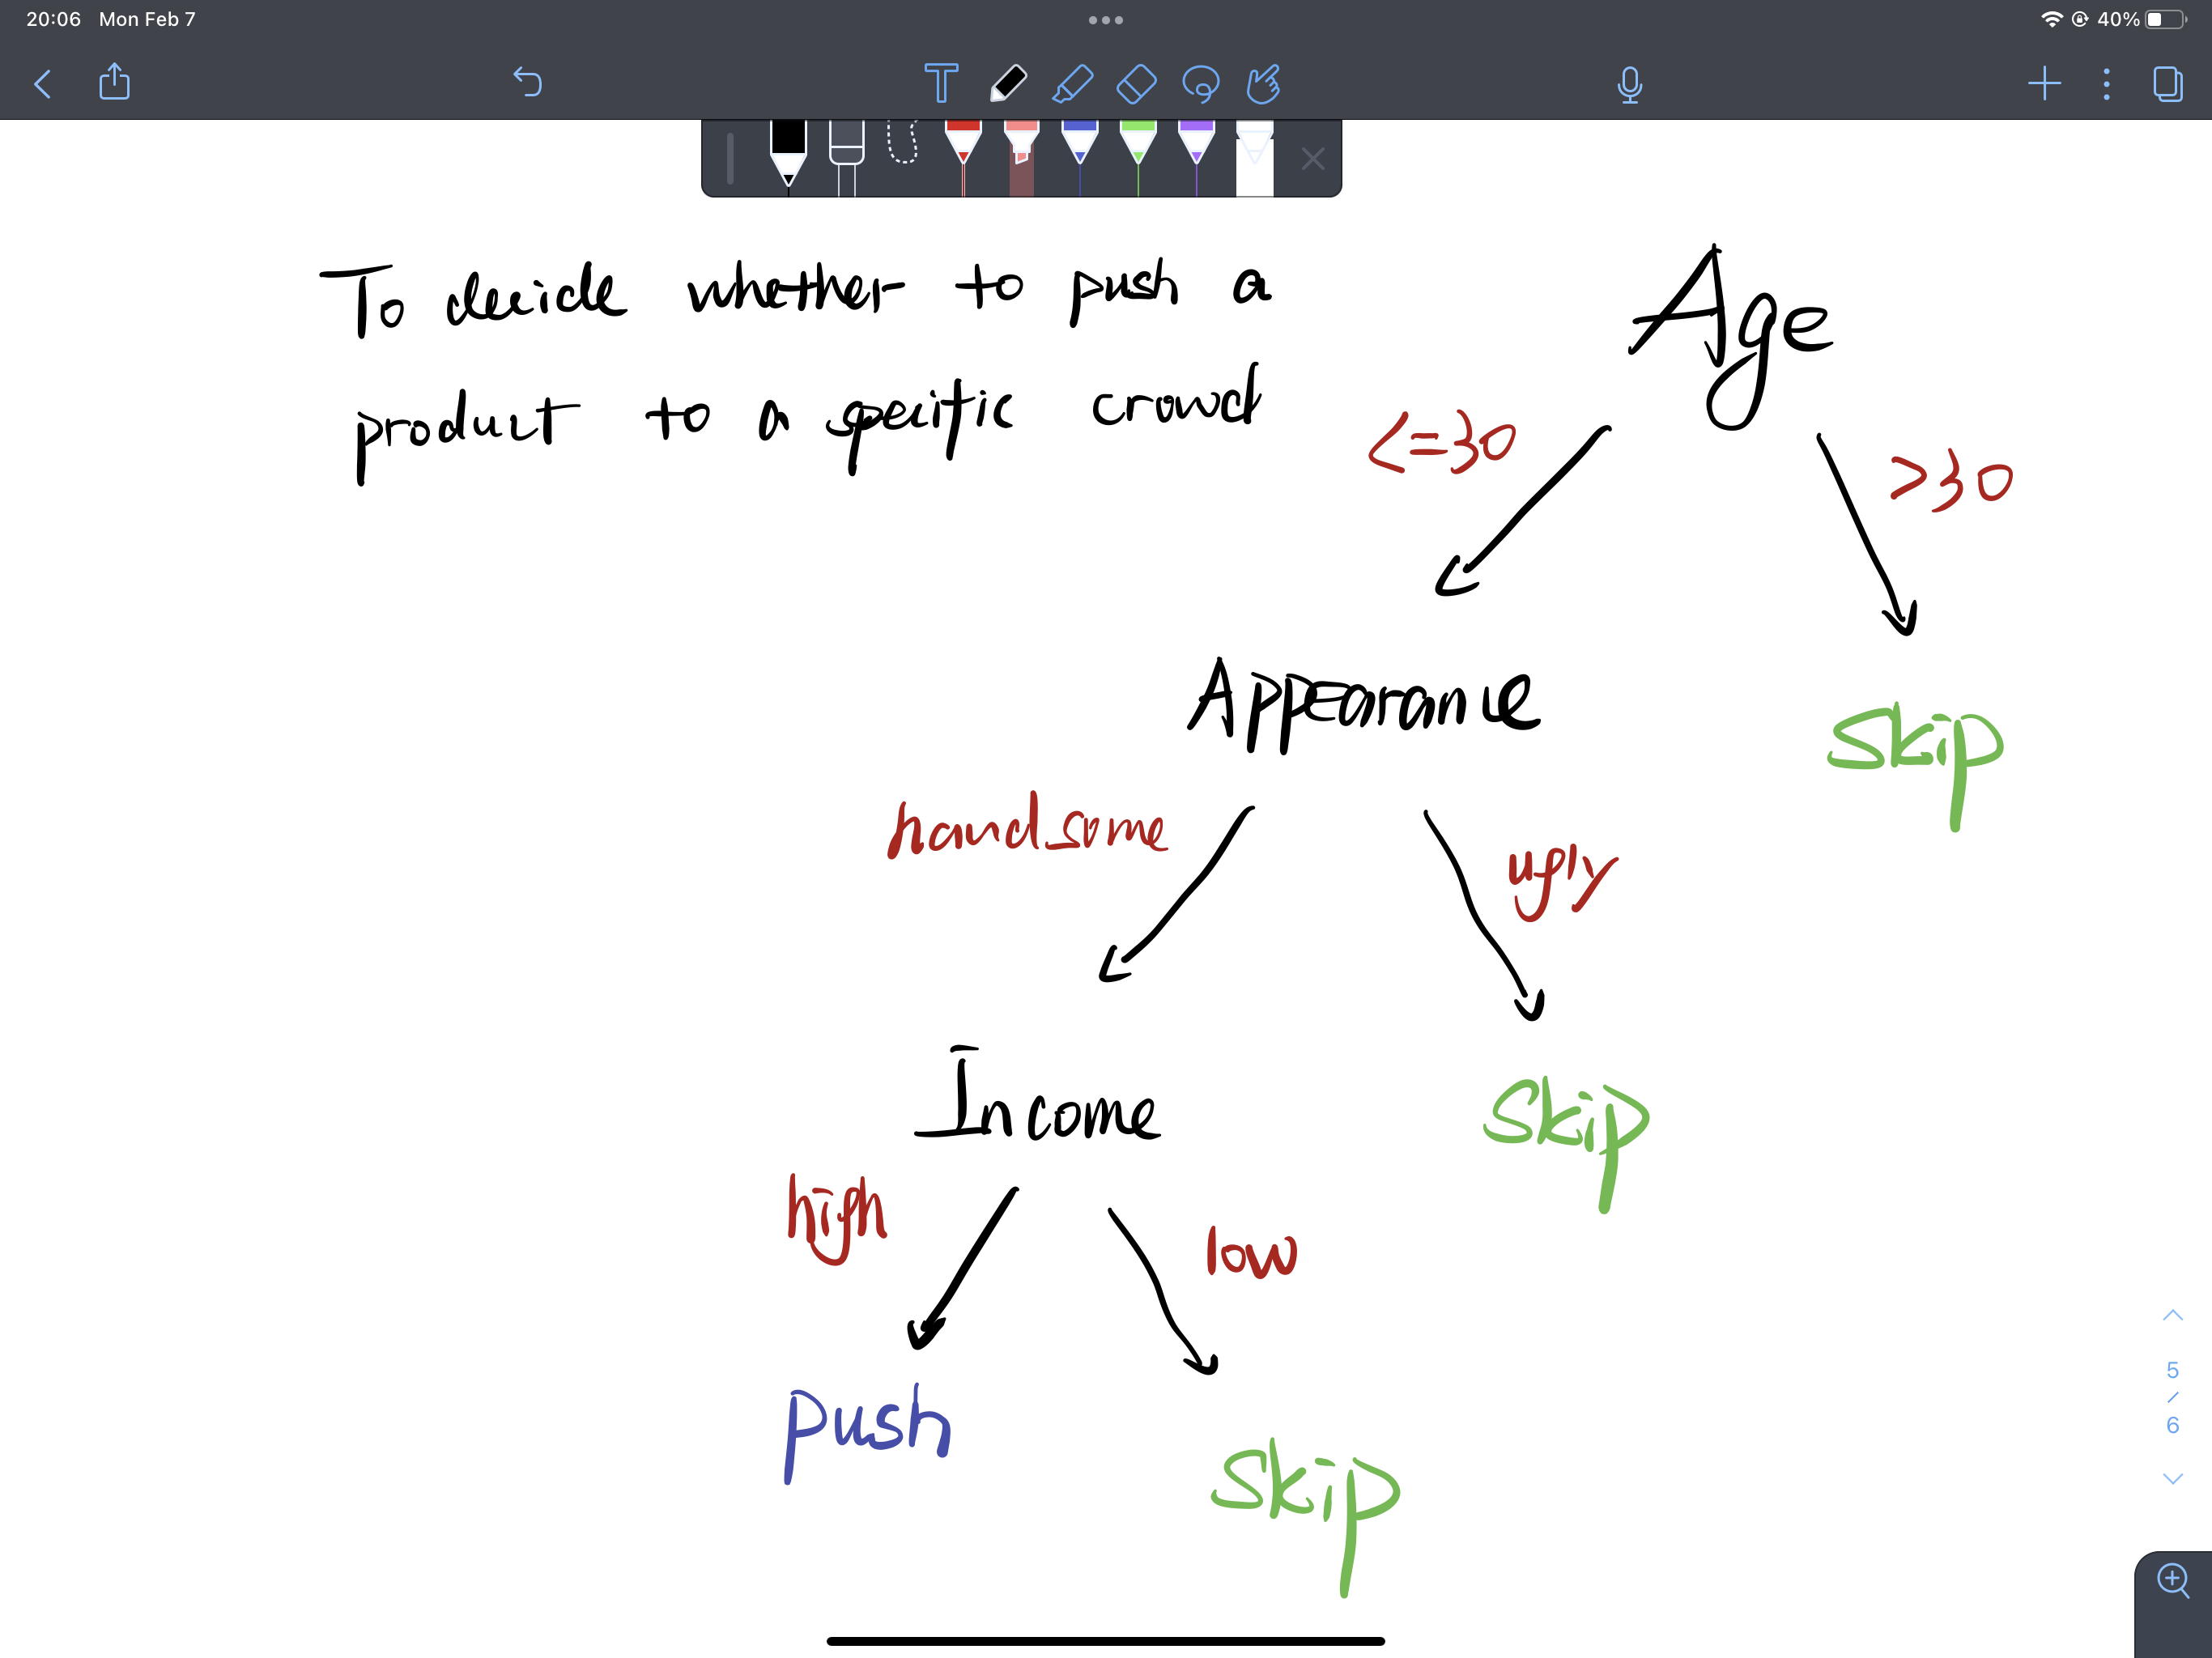

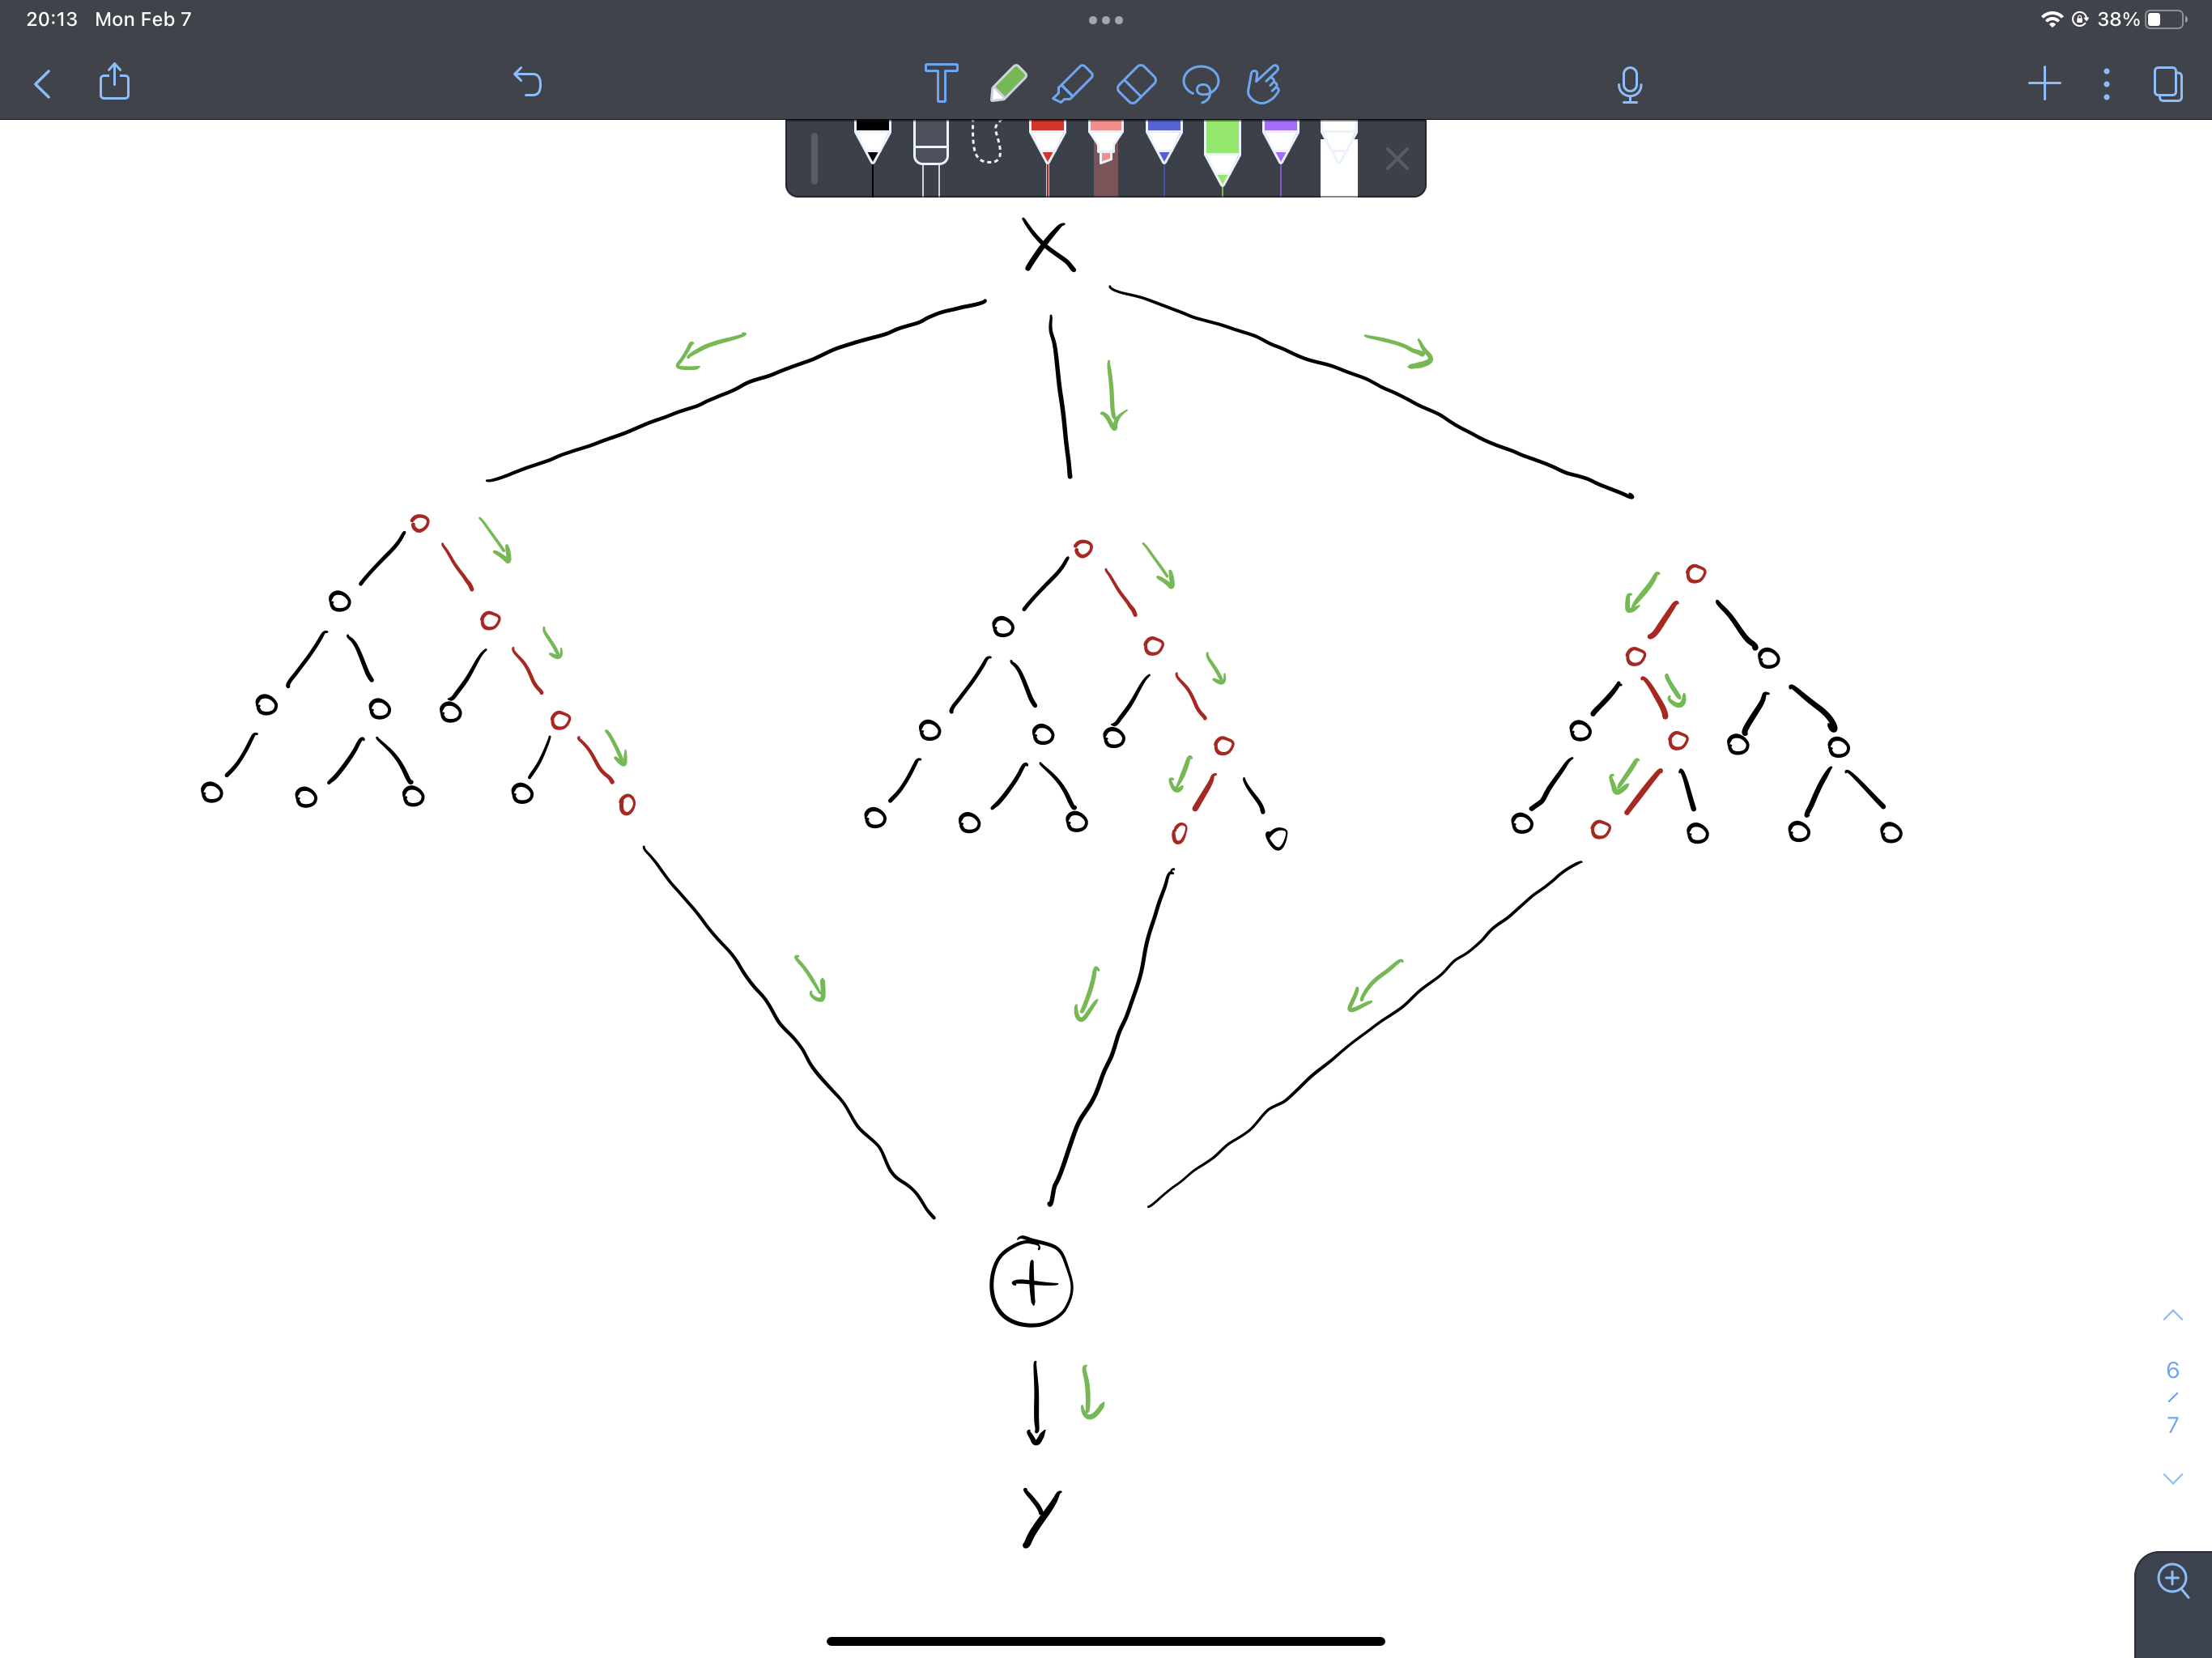

Additionally, fitting data based on **neural network** is a more accurate method to make decisions.The input some parameters like the length of stay on some items, the click ratio, and view history are able to infulence the result of training of the neural network. In some cases, these elements might be proportional to the probability of a click，and the weight of them could be renewed iteratively. Through learning the dataset again and again, the model would be mature enough to be applied in practical scenarios.

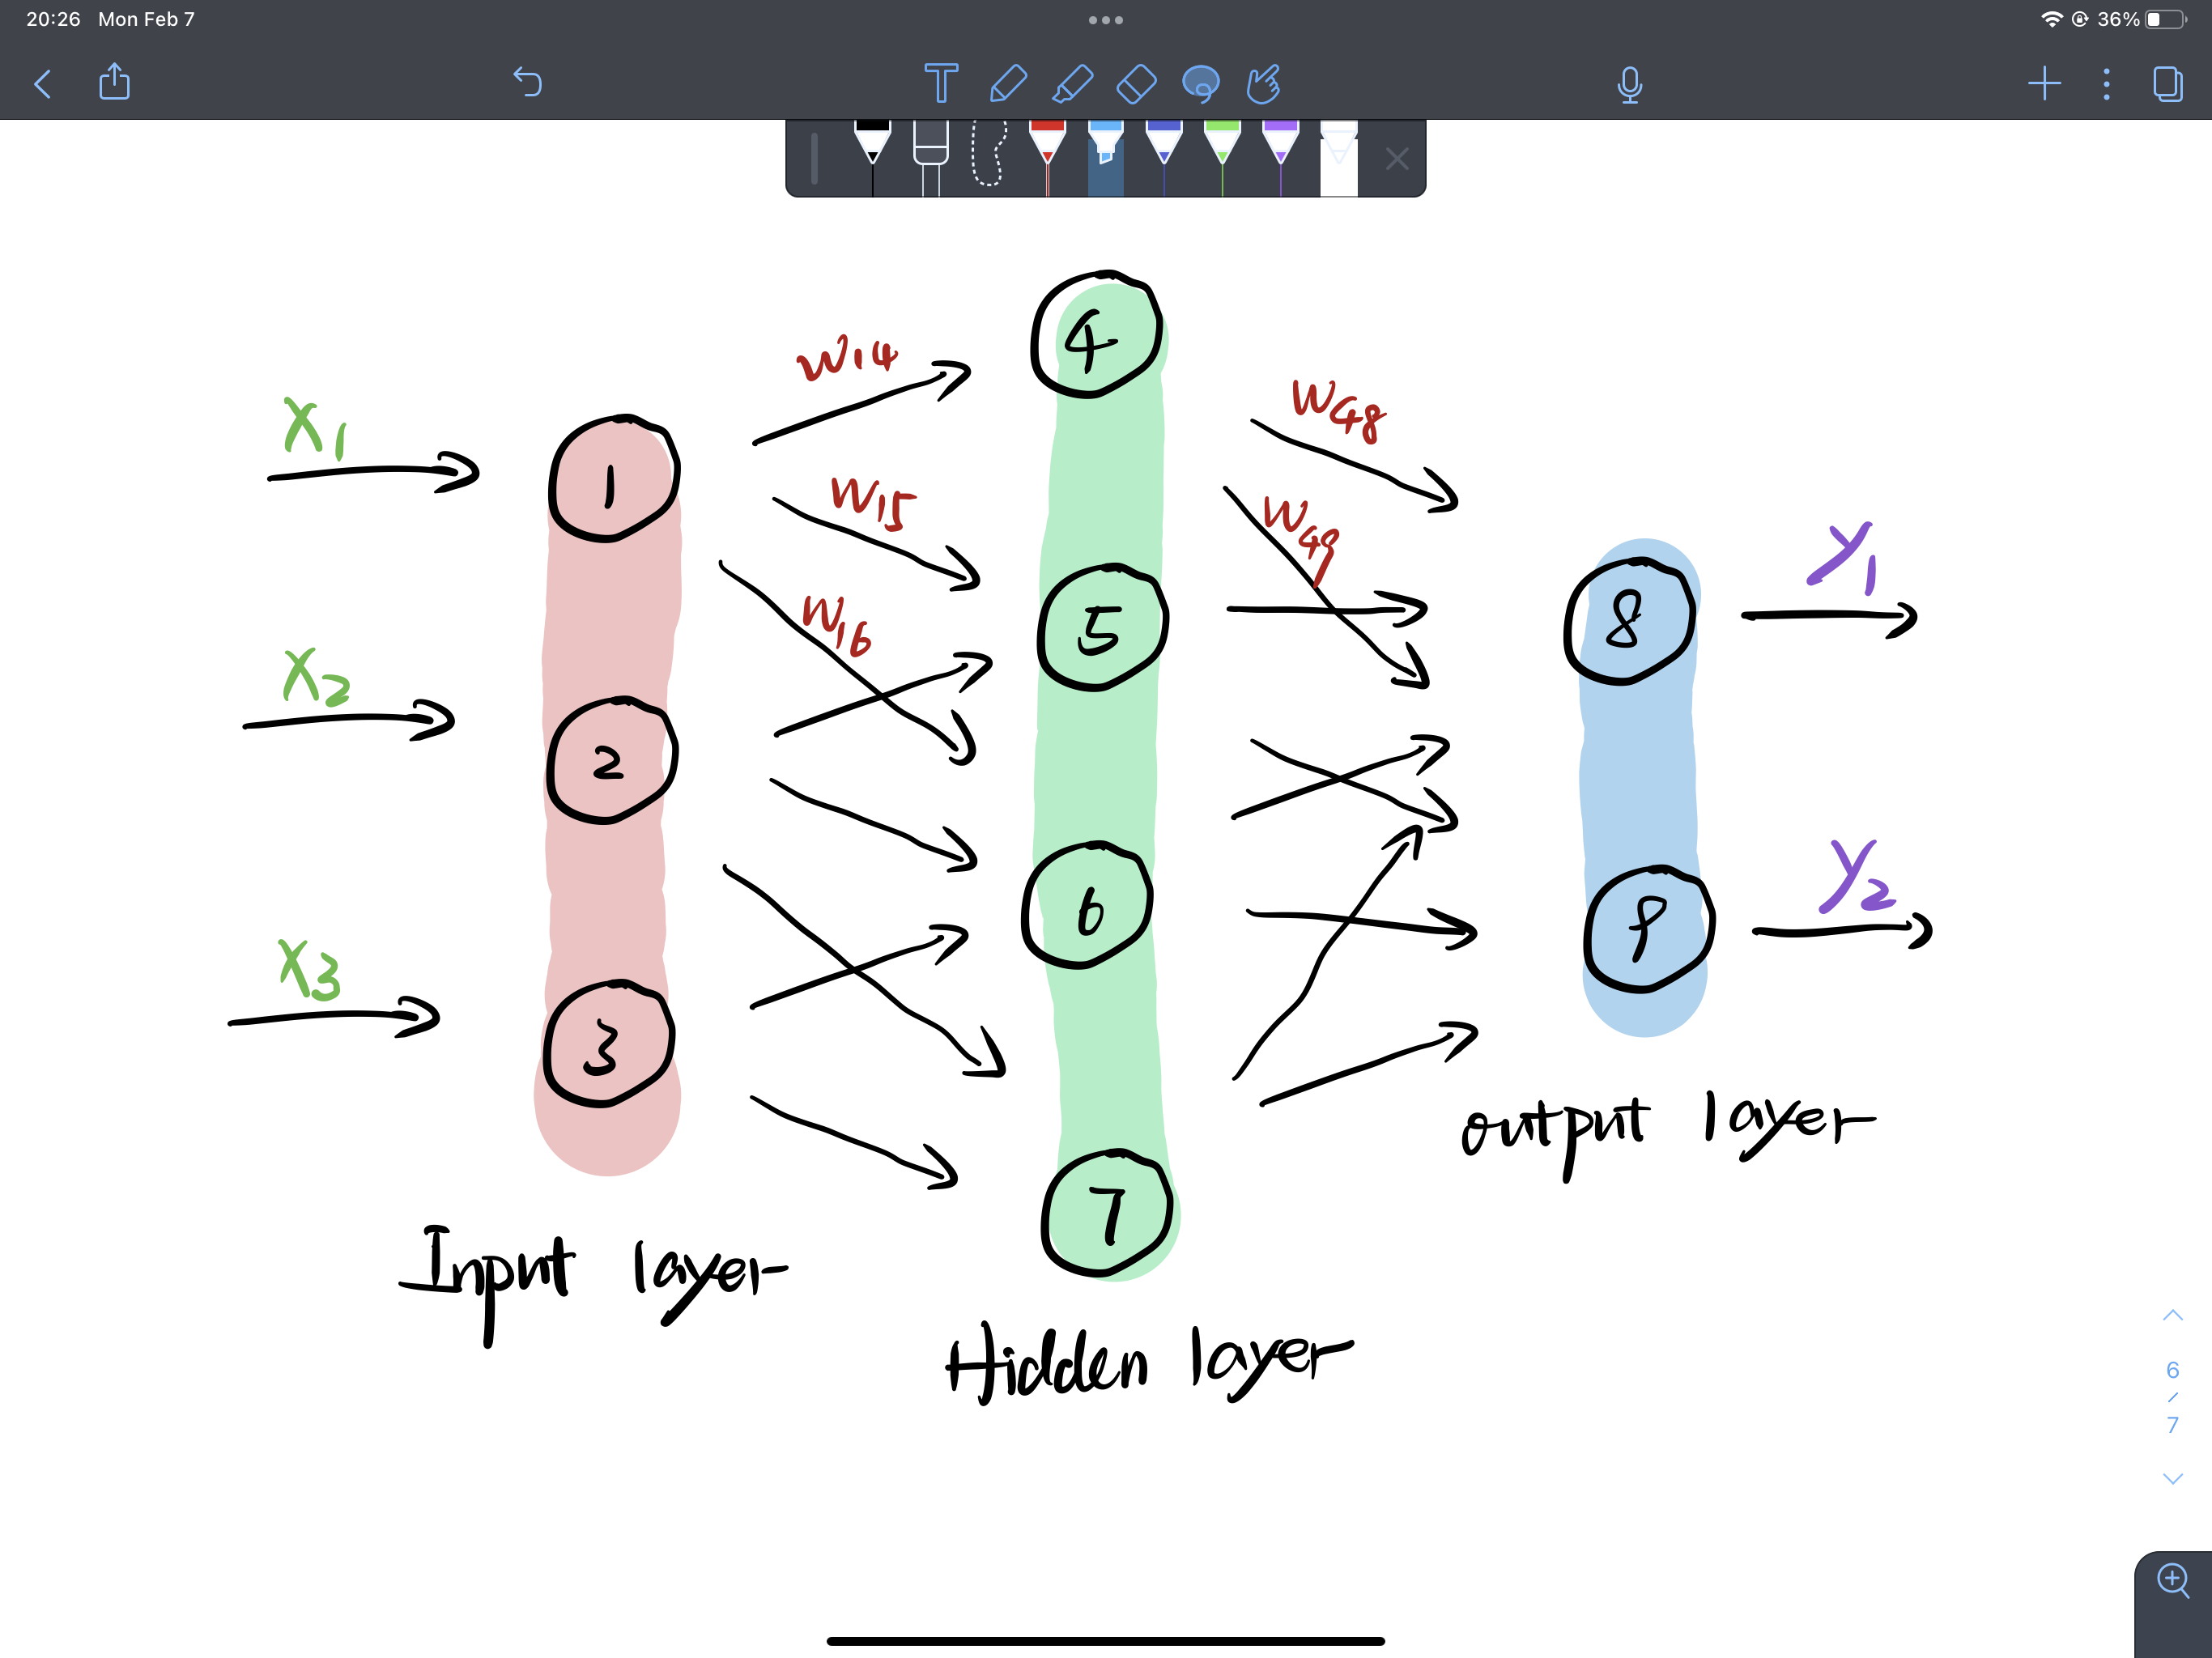

**3.optimized target**

In reality, optimizing the target is also a  crucial part in the whole model, for instance, the click-through rate，sales volume， income and something else are all the things that companies concentrate on. Therefore, these factors could be seen as the optimization metrics, and officals can modify the strategy, manipulate the market, control the sales and discounts in order to obtain the best effect.

A recommended scoring formula could be written as follows:

$Y = \sum_iX_iw_i$

$Y$: recommended score

$X_i$:influence factors, like click-through rate, the number of comments, pageviews, ect.

$w_i$:Corresponding weights of influencing factors

**Conclusion**

In a nutshell, the manipulator can train the model by observing consumer behavior, history, preference, and extracting influence factors such as product features and information. Finally get a mature model to push consumers the products they are most likely to buy. Of course, merchants can also artificially manipulate the pushed items to promote the release and sale of new products - of course, this is not done at will.